<a href="https://colab.research.google.com/github/yuting-tseng/stock_predict/blob/master/stoc_TM_201901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Finance Predict

ref: 
1. [ML預測股價](https://www.finlab.tw/%E8%B6%85%E7%B0%A1%E5%96%AE-Machine-Learning-%E9%A0%90%E6%B8%AC%E8%82%A1%E5%83%B9/)
2. [stock module github](https://github.com/WillKoehrsen/Data-Analysis/tree/master/stocker)

In [0]:
# !git clone https://github.com/koreal6803/Stocker.git
# !pip install -r Stocker/requirements.txt

In [0]:
import warnings
import pandas as pd
from Stocker.stocker import Stocker
import pandas_datareader.data as web

warnings.filterwarnings('ignore')

In [3]:
df = web.DataReader('4704.T', 'yahoo')
price = df['Adj Close'].squeeze()
price.head()

# price = price[price.index < '2018-08-01']
# price.tail()

Date
2010-01-04    2835.962158
2010-01-05    2915.736084
2010-01-06    2915.736084
2010-01-07    2907.758789
2010-01-08    2923.713623
Name: Adj Close, dtype: float64

In [4]:
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2010-01-04 00:00:00 to 2019-01-23 00:00:00.


Predicted Price on 2019-04-23 00:00:00 = $5828.00


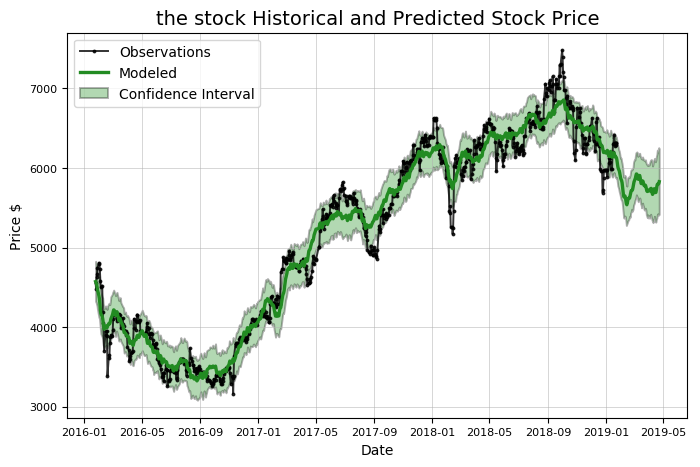

In [5]:
model, model_data = tsmc.create_prophet_model(days=90)


Prediction Range: 2018-01-23 00:00:00 to 2019-01-23 00:00:00.

Predicted price on 2019-01-22 00:00:00 = $7849.72.
Actual price on    2019-01-22 00:00:00 = $6290.00.

Average Absolute Error on Training Data = $124.51.
Average Absolute Error on Testing  Data = $674.52.

When the model predicted an increase, the price increased 45.78% of the time.
When the model predicted a  decrease, the price decreased  39.36% of the time.

The actual value was within the 80% confidence interval 34.10% of the time.


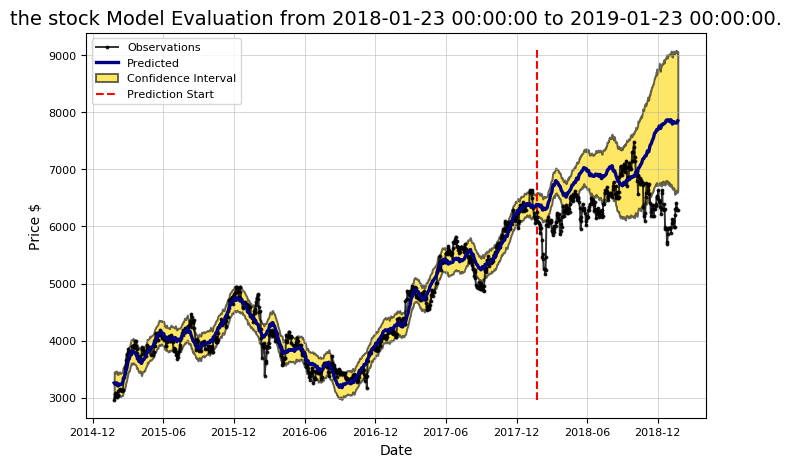

In [6]:
tsmc.evaluate_prediction()

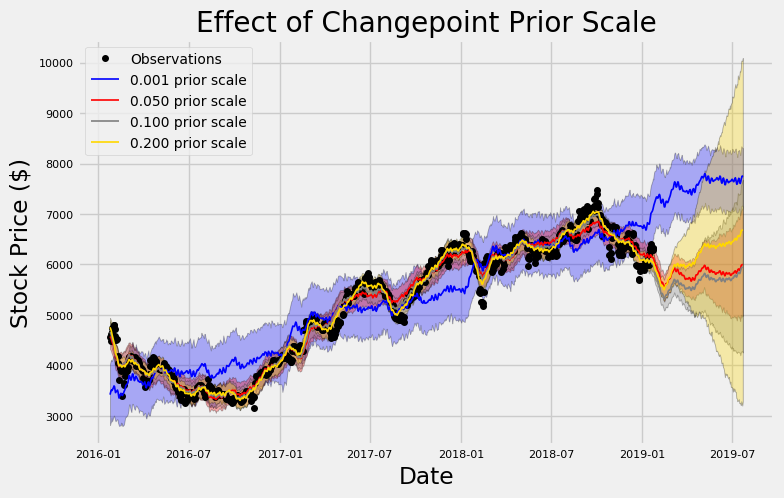

In [7]:
# 我們可以調整短中長期的參數，讓它預測短中長期股價
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Prediction Range: 2018-01-23 00:00:00 to 2019-01-23 00:00:00.

Predicted price on 2019-01-22 00:00:00 = $5362.16.
Actual price on    2019-01-22 00:00:00 = $6290.00.

Average Absolute Error on Training Data = $85.75.
Average Absolute Error on Testing  Data = $1303.87.

When the model predicted an increase, the price increased 47.50% of the time.
When the model predicted a  decrease, the price decreased  42.14% of the time.

The actual value was within the 80% confidence interval 90.80% of the time.


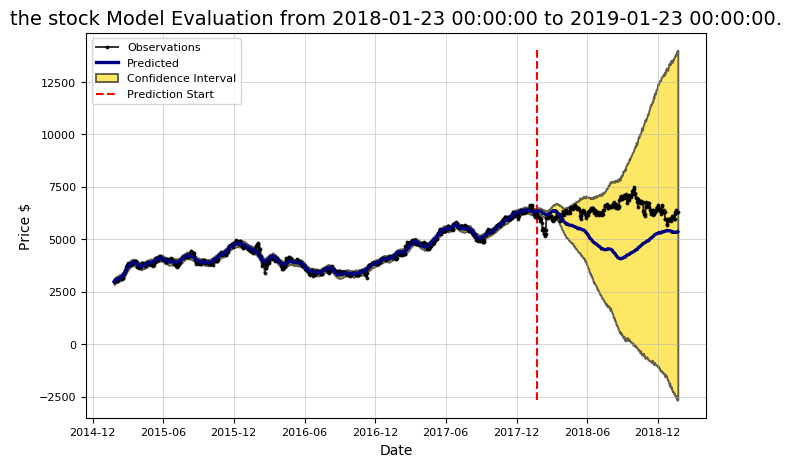

In [8]:
# 我們藉由上述的參數枚舉，可以知道哪一個參數（changepoint_prior）是最好的 我們可以藉由執行predict_future 來預測股價囉！
tsmc.evaluate_prediction()